# **Análisis Estadístico de Redes Sociales: Taller 2**

## Valentina Cardona Saldaña

Desarrollo de los ejercicios propuestos en el [Taller 2](https://www.dropbox.com/scl/fi/gncmfys1f4vh4jn9b9klj/Taller_2.pdf?rlkey=ak00y804yao89stj5m19nief1&e=1&dl=0) de la asignatura [Análisis Estadístico de Redes Sociales](https://sites.google.com/view/juansosa/social-networks), impartida por el profesor [Juan Sosa](https://github.com/jstats1702) como parte del programa de la Maestría en Ciencias - Estadística de la Universidad Nacional de Colombia.

In [1]:
# Paquetes
import pandas as pd
import numpy as np
import math
import random
import rdata
from collections import Counter

import igraph as ig
#import networkx as nx

import matplotlib.pyplot as plt

from sklearn.manifold import MDS
import warnings

In [2]:
# FUNCIÓN PARA CALCULAR MEDIA GLOBAL DE INTERACCIONES

def MediaGlobal(Y):
    
    """
    Calcula la media global de las interacciones para una matriz de adyacencia dada.

    Parámetros:
        Y (pd.DataFrame): La matriz de adyacencia.

    Retorna:
        float: La media global de las interacciones.
    """
    
    ## Obtener n
    n = len(Y)
    ## Inicializar la suma de las interacciones
    E = 0
    
    ## Calcular la suma de las interacciones (excluyendo la diagonal principal)
    for i in range(n):
        for j in range(n):
            if i != j:
                E += Y.iloc[i, j]
    
    # Calcular la media global de las interacciones
    MediaGlobal_Interacciones = E / (n * (n - 1))
    
    return round(MediaGlobal_Interacciones, 3)

### Ejercicio 1

Reproducir los ejemplos 3.1, 3.2, 5.2, 5.3, 6.1 de [Conceptos fundamentales de teoría de grafos](https://rpubs.com/jstats1702/1126816) en Python usando igraph

#### 3.1 Ejemplo: Vecinos y Grado

In [3]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


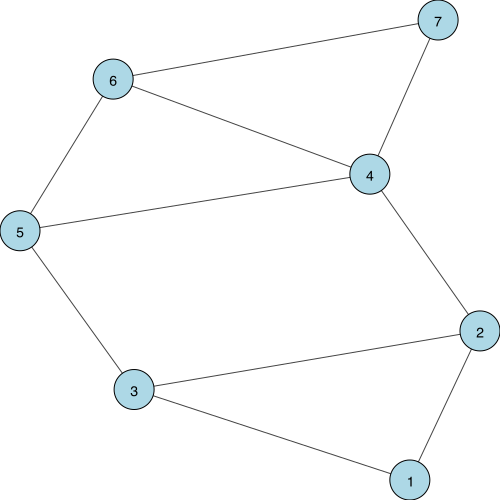

In [4]:
# visualización
random.seed(11)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g, vertex_size = 40, vertex_color = 'lightblue', bbox = (500, 500))

In [5]:
# vecinos del vértice 1
g.neighborhood(0) ## Se introduce el ID del vértice

## Arroja una lista que incluye al mismo vértice de primeras

[0, 1, 2]

In [6]:
# grados

## Imprimir lista de vértices
print(g.vs['name'])

## El grado de cada vértice
print(g.degree())

['1', '2', '3', '4', '5', '6', '7']
[2, 3, 3, 4, 3, 3, 2]


#### 3.2 Ejemplo: Grado de entrada y Grado de salida

In [7]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


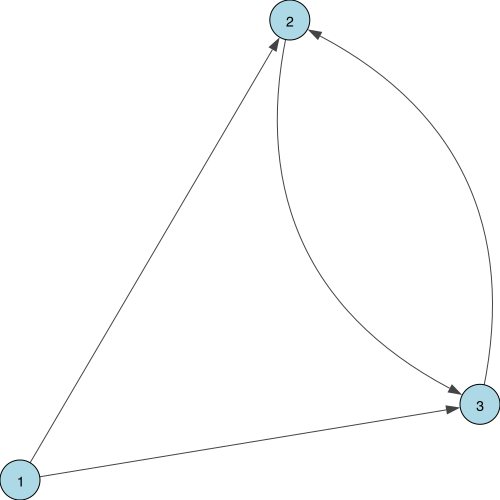

In [8]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg, vertex_size = 40, vertex_color = 'lightblue', bbox = (500, 500))

In [9]:
# grado de entrada

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.indegree())

['1', '2', '3']
[0, 2, 2]


In [10]:
# grado de salida

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.outdegree())

['1', '2', '3']
[2, 1, 1]


#### 5.2 Ejemplo: Componentes

In [11]:
# red no dirigida
g = ig.Graph(edges = [[1,7], [2,7], [2,4], [3,6], [4,7], [5,11], [6,12], [7,8], [7,9], [7,10]])

## Agregar nombres a red
g.vs['name'] = range(g.vcount()+1)
## Eliminar vértice 0
g.delete_vertices(0)

## Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


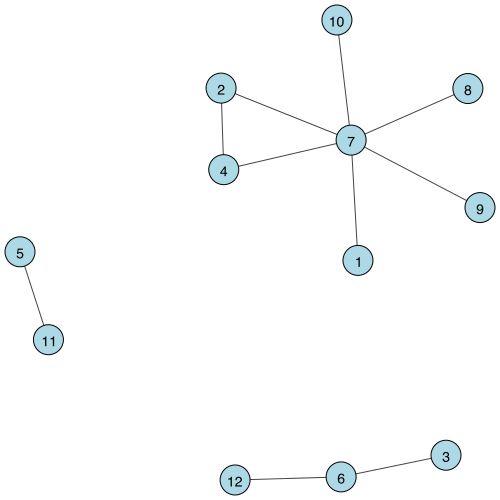

In [12]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g, vertex_size = 30, vertex_color = 'lightblue', bbox = (500, 500))

In [13]:
# conectado?
g.is_connected()

False

In [14]:
# componentes
components = g.connected_components()

print(components.summary(), end = "\n\n")

# membership
c = components.membership
print("membership")
print(g.vs['name'])
print(c, end = "\n\n")

# csize
print("csize")
print(components.sizes(), end = "\n\n")

# n
print("num")
print(components.__len__())

Clustering with 12 elements and 3 clusters

membership
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1]

csize
[7, 3, 2]

num
3


#### 5.3 Ejemplo: Conexión débil y fuerte

In [15]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


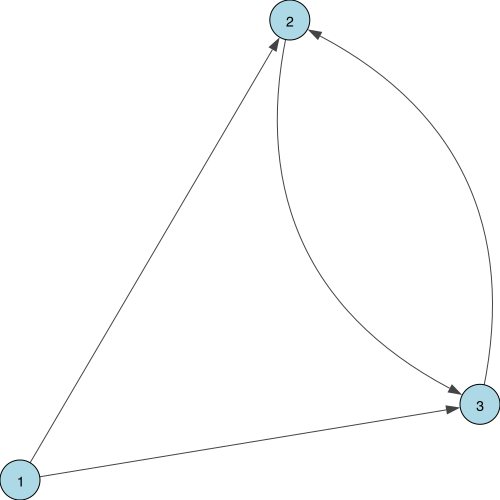

In [16]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg, vertex_size = 40, vertex_color = 'lightblue', bbox = (500, 500))

In [17]:
# conectado débilmente?
dg.is_connected(mode = "weak")

True

In [18]:
# conectado fuertemente?
dg.is_connected(mode = "strong")

False

#### 6.1 Ejemplo: Distancias

In [19]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


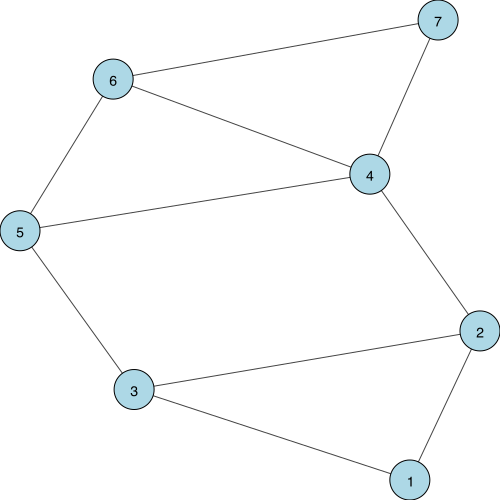

In [20]:
# visualización
random.seed(11)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g, vertex_size = 40, vertex_color = 'lightblue', bbox = (500, 500))

In [21]:
# distancia
g.distances(source = "1", target = "6")

[[3]]

In [22]:
# caminata

## vertex ID
print(g.get_shortest_paths(v = "1", to = "6"), end = "\n\n")

## nombres (sumar 1)
print(np.array(g.get_shortest_paths(v = "1", to = "6")) + 1)

[[0, 1, 3, 5]]

[[1 2 4 6]]


In [23]:
# caminatas

## vertex ID
print(g.get_all_shortest_paths(v = "1", to = "6"), end = "\n\n")

## nombres (sumar 1)
print(np.array(g.get_all_shortest_paths(v = "1", to = "6")) + 1)

[[0, 2, 4, 5], [0, 1, 3, 5]]

[[1 3 5 6]
 [1 2 4 6]]


In [24]:
# distancias
D = g.distances()
D

[[0, 1, 1, 2, 2, 3, 3],
 [1, 0, 1, 1, 2, 2, 2],
 [1, 1, 0, 2, 1, 2, 3],
 [2, 1, 2, 0, 1, 1, 1],
 [2, 2, 1, 1, 0, 1, 2],
 [3, 2, 2, 1, 1, 0, 1],
 [3, 2, 3, 1, 2, 1, 0]]

In [25]:
# diámetro
g.diameter()

3

In [26]:
# diámetro (otra manera)
D = np.array(D)
np.max(np.tril(D, k = -1))

3

In [27]:
# sendero del diámetro
d = g.get_diameter()
d

## vertex ID
print(d, end = "\n\n")

## nombres (sumar 1)
print(np.array(d) + 1)

[0, 1, 3, 5]

[1 2 4 6]


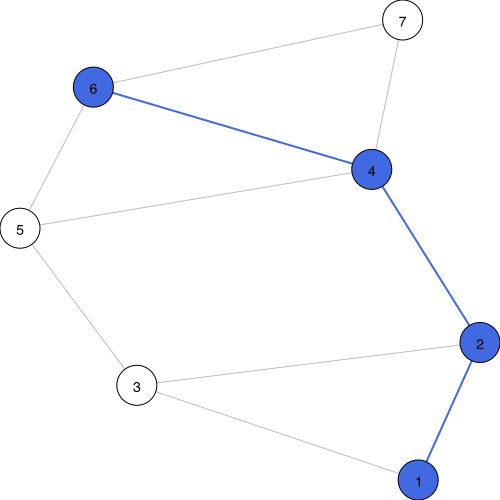

In [28]:
# visualización del diámetro

random.seed(14)

## Convertir los ID de vértices a nombres
vertex_names = [v["name"] for v in g.vs]
diameter_names = [vertex_names[i] for i in d]

## Visualización del diámetro
g.vs["color"] = "white"
g.es["color"] = "grey"
g.es["width"] = 1
g.vs[d]["color"] = "royalblue"

## Obtener los índices de las aristas que están en el camino del diámetro
path_edges = [(d[i], d[i+1]) for i in range(len(d) - 1)]

## Marcar las aristas en el camino del diámetro
for edge in path_edges:
    edge_index = g.get_eid(edge[0], edge[1])
    g.es[edge_index]["color"] = "royalblue"
    g.es[edge_index]["width"] = 2

ig.plot(g, layout = "fr", vertex_label = g.vs["name"], vertex_size = 40, bbox = (500, 500))

In [29]:
# distancia geodésica promedio
g.average_path_length()

1.6666666666666667

In [30]:
# distancia geodésica promedio (otra manera)
np.mean(D[np.tril(np.ones(D.shape), k=-1).astype(bool)])

1.6666666666666667

In [31]:
# distribución de las distancias
dist = g.path_length_hist()

## Lo que hay dentro del objeto
print(dist.__dict__, end = "\n\n")

## $res
print(dist._bins, end = "\n\n")

## $unconnected
print(dist.unconnected, end = "\n\n")

{'_bin_width': 1.0, '_bins': [10, 8, 3], '_min': 1.0, '_max': 4.0, '_running_mean': RunningMean(n=21, mean=1.6666666666666667, sd=0.7302967433402215), 'unconnected': 0}

[10, 8, 3]

0



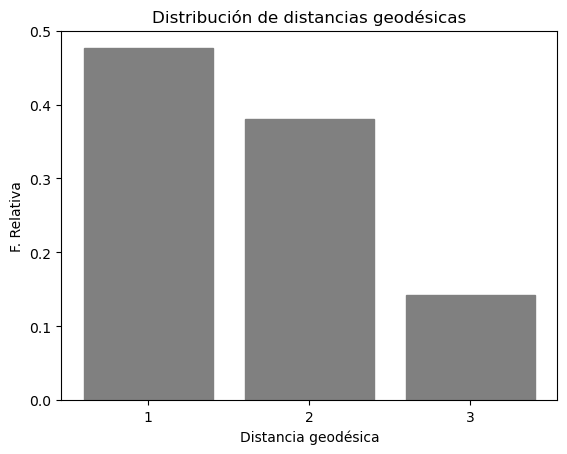

In [32]:
# visualización
senderos = dist._bins

## Asignar nombres a los elementos de la lista
senderos_names = ["1", "2", "3"]

## Crear un gráfico de barras
plt.bar(senderos_names, np.array(senderos) / sum(senderos), color = 'grey', edgecolor = 'grey')

## Configurar etiquetas y título
plt.xlabel('Distancia geodésica')
plt.ylabel('F. Relativa')
plt.title('Distribución de distancias geodésicas')

## Mostrar el gráfico de barras
plt.show()

### Ejercicio 2; 3; 4 y 5

La solución para el ejercicio 2, 3 y 4 que requerían una demostración matemática, y el ejercicio 4 que requería una comprensión teórica, se encuentra detallada en el informe correspondiente al taller titulado [redes - Taller 2 - Valentina Cardona.pdf](). Por favor, consulte dicho informe para más detalles.

### Ejercicio 6

Considere el conjunto de datos dado en `comtrade.RData` (este archivo contiene una arreglo de cuatro dimensiones denominado comtrade), asociado con el crecimiento anual del comercio (diferencia en dólares en escala logarítmica respecto al año 2000). Este conjunto de datos involucra 30 países, 10 años desde 1996 hasta 2005, y 6 clases de productos diferentes, como se muestra a continuación:

In [33]:
# datos
comtrade = rdata.parser.parse_file("./Datos/comtrade.RData")
comtrade = rdata.conversion.convert(comtrade)
comtrade = comtrade["comtrade"]

comtrade = comtrade.to_dataframe(name = 'value').reset_index()

print(comtrade['dim_0'].unique())
print(comtrade['dim_2'].unique())
print(comtrade['dim_3'].unique())

['Australia' 'Austria' 'Brazil' 'Canada' 'China' 'China, Hong Kong SAR'
 'Czech Rep.' 'Denmark' 'Finland' 'France' 'Germany' 'Greece' 'Indonesia'
 'Ireland' 'Italy' 'Japan' 'Malaysia' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Rep. of Korea' 'Singapore' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Kingdom' 'USA']
['Chemicals' 'Crude materials, inedible, except fuels'
 'Food and live animals' 'Machinery and transport equipment'
 'Manufact goods classified chiefly by material'
 'Miscellaneous manufactured articles']
['1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005']


(a) Calcule el aumento medio global $\tilde{y}$ a lo largo de los 10 años en bienes manufacturados. Para ello considere la matriz de adyacencia $Y$ dada por:

In [34]:
## Filtrar
comtrade = comtrade[comtrade["dim_2"].isin(["Manufact goods classified chiefly by material",
                                            "Miscellaneous manufactured articles"])].reset_index(drop = True)

## Matriz de adyacencia
Y = comtrade.groupby(['dim_0', 'dim_1']).agg({"value": "mean"}).reset_index().pivot(index = "dim_0", 
                                                                                    columns = "dim_1",
                                                                                    values = "value")
Y = Y.rename_axis(None, axis=0).rename_axis(None, axis=1)
Y.head()

,Australia,Austria,Brazil,Canada,China,"China, Hong Kong SAR",Czech Rep.,Denmark,Finland,France,...,Norway,Rep. of Korea,Singapore,Spain,Sweden,Switzerland,Thailand,Turkey,USA,United Kingdom
Australia,NaN,0.102931,0.084732,0.034879,0.079551,-0.016420,0.183374,0.085059,0.031835,0.017981,...,0.029414,0.019443,-0.075869,0.113773,0.096844,0.010514,-0.013762,0.135197,0.084532,0.081432
Austria,0.083836,NaN,0.060313,0.057183,0.089703,0.057932,0.048708,0.031214,0.029630,0.034787,...,-0.004173,0.007196,0.018856,0.085000,0.033096,0.001295,0.020611,0.116162,0.049532,0.062307
Brazil,-0.057600,0.026306,NaN,0.069744,0.144520,0.013517,0.064837,-0.037100,-0.079644,0.039121,...,0.009589,-0.042804,-0.122657,0.163180,-0.022830,0.022063,0.015188,0.126156,0.045584,0.026421
Canada,0.002869,0.053370,-0.026894,NaN,0.097591,0.003946,0.041238,0.025930,-0.007394,-0.001503,...,0.041124,-0.015649,-0.035125,0.071929,-0.043209,0.019135,0.001399,0.082834,0.044747,0.057367
China,0.132537,0.118548,0.141158,0.161668,NaN,0.024918,0.248491,0.139456,0.156607,0.130919,...,0.128871,0.124398,0.078946,0.168432,0.174294,0.091045,0.141130,0.209001,0.139090,0.203799


In [35]:
# Aumento medio global

## Uso de función
MediaGlobal(Y)

0.038

(b) Calcule la media de todas las observaciones de cada fila de $Y$, es decir, calcule la media fila $\tilde{y}_{i}\cdot = \frac{1}{n-1} \sum_{j:j\neq i} y_{i,j}$ para cada país. Realice una histograma de los promedios fila $\tilde{y}_{i}\cdot$. Los promedios fila caracterizan diferentes niveles de actividad de los nodos en términos de la sociabilidad. ¿Cómo se pueden interpretar los promedios fila $\tilde{y}_{i}\cdot$ en este caso?

In [36]:
# Media de cada fila
mean_row = Y.sum(axis = 1) / (Y.shape[1] - 1)
mean_row.sort_values(ascending=False).head()

China         0.147716
Turkey        0.100510
Czech Rep.    0.094097
Thailand      0.054769
Malaysia      0.050017
dtype: float64

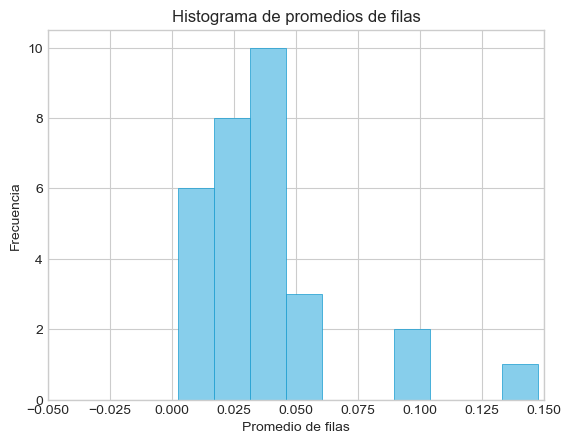

In [37]:
# Crear el histograma

plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(mean_row, facecolor = 'skyblue', edgecolor = '#169acf', linewidth = 0.5)
plt.xlabel('Promedio de filas')
plt.ylabel('Frecuencia')
plt.title('Histograma de promedios de filas')
plt.xlim([-0.05, 0.15])
plt.show()

(c) Calcule la media de todas las observaciones de cada columna de $Y$, es decir, calcule la media columna $\tilde{y}_{\cdot j} = \frac{1}{n-1} \sum_{i:i\neq j} y_{i,j}$ para cada país. Realice una histograma de los promedios columna $\tilde{y}_{\cdot j}$. Los promedios columna caracterizan diferentes niveles de actividad de los nodos en términos de la popularidad. ¿Cómo se pueden interpretar los promedios columna $\tilde{y}_{\cdot j}$ en este caso?

In [38]:
# Media de cada columna
mean_col = Y.sum(axis = 0) / (Y.shape[1] - 1)
mean_col.sort_values(ascending=False).head()

China         0.145698
Mexico        0.142069
Turkey        0.111075
Czech Rep.    0.100692
Spain         0.074028
dtype: float64

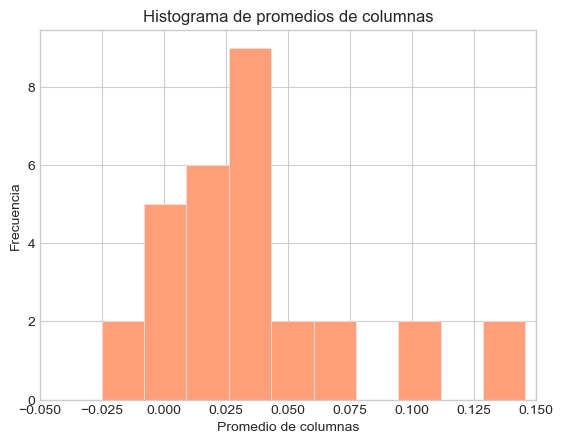

In [39]:
# Crear el histograma

plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(mean_col, facecolor = 'lightsalmon', edgecolor = 'mistyrose', linewidth = 0.5)
# Agregar etiquetas y título
plt.xlabel('Promedio de columnas')
plt.ylabel('Frecuencia')
plt.title('Histograma de promedios de columnas')
plt.xlim([-0.05, 0.15])
plt.show()

(d) Calcule tanto la media de los promedios fila $\tilde{y}_{i} \cdot$ como la media de los promedios columna $\tilde{y}_{\cdot j}$. ¿Qué se puede concluir?

In [40]:
print("Media de promedios fila: ", round(mean_row.mean(), 4))
print("Media de promedios columna: ", round(mean_col.mean(), 4))

Media de promedios fila:  0.0378
Media de promedios columna:  0.0378


(d) Calcule tanto la DE de los promedios fila $\tilde{y}_{i} \cdot$ como la DE de los promedios columna $\tilde{y}_{\cdot j}$. ¿Qué se puede concluir?

In [41]:
print("DE de promedios fila: ", round(mean_row.std(), 3))
print("DE de promedios columna: ", round(mean_col.std(), 3))

DE de promedios fila:  0.03
DE de promedios columna:  0.041


(f) Calcule el coeficiente de correlación entre los promedios fila $\tilde{y}_{i} \cdot$ y los promedios columna $\tilde{y}_{\cdot j}$. Realice un dispersograma de los promedios columna $\tilde{y}_{\cdot j}$ (eje y) frente a los promedios fila $\tilde{y}_{i} \cdot$ (eje x), junto con la recta $y = x$ como punto de referencia. ¿Qué se puede concluir?

In [42]:
# Calcular el coeficiente de correlación
print("Coeficiente de correlación: ", round(mean_row.corr(mean_col), 3))

Coeficiente de correlación:  0.7


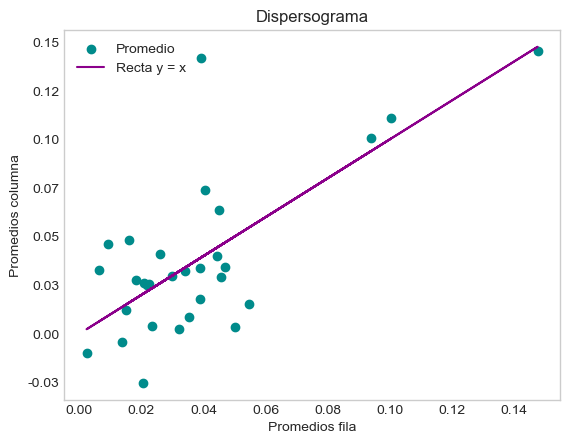

In [43]:
# Crear el dispersograma

plt.scatter(mean_row, mean_col, color = "darkcyan", label = 'Promedio')
plt.plot(mean_row, mean_row, color = 'darkmagenta', label = 'Recta y = x')

## Configurar los ejes con 2 decimales
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}'.format(y)))

## Etiquetas y título
plt.xlabel('Promedios fila')
plt.ylabel('Promedios columna')
plt.title('Dispersograma')
plt.legend()

# Cambiar el color del fondo del gráfico y del grid a blanco
plt.gca().set_facecolor('white')
plt.grid(color = 'white')

plt.show()

### Ejercicio 7

Considere el conjunto de datos dado en `conflict.RData` recopilado por Mike Ward y Xun Cao del departamento de Ciencias Políticas de la Universidad de Washington. Estos datos están asociados con datos de conflictos entre países en los años 90. El archivo `conflict.RData` contiene una lista con tres arreglos, **X**, **Y**, y **D**. **X** tiene tres campos: `population` (población en millones), `gdp` (PIB en millones de dolares), `polity` (puntuación política: índice de democracia). $Y$ hace referencia a una matriz ${Y}=[y_{i,j}]$ en la que $y_{i,j}$ representa el número de conflictos iniciados por el país $i$ hacia el país $j$. Finalmente, **D** es un arreglo de tres dimensiones dimensiones cuya tercera dimensión contiene índices entre cada par de países asociados con: comercio (dimensión 1), importaciones (dimensión 2), organizaciones intergubernamentales (dimensión 3) y distancia geográfica (dimensión 4).

In [44]:
## Leer datos
conflict = rdata.parser.parse_file("./Datos/conflict.RData")
conflict = rdata.conversion.convert(conflict)

print(conflict["dat"].keys(), end = "\n\n")

## Matriz X
X = conflict["dat"]["X"].to_dataframe(name = 'value').reset_index().pivot(index = "dim_0",
                                                                        columns = "dim_1",
                                                                        values = "value").reset_index()
X = X.rename(columns = {"dim_0": "country"}).rename_axis(None, axis = 1)
print(X.columns, end = "\n\n")

## Matriz Y
Y = conflict["dat"]["Y"].to_dataframe(name = 'value').reset_index().pivot(index = "dim_0",
                                                                        columns = "dim_1",
                                                                        values = "value")
Y = Y.rename_axis(None, axis = 0).rename_axis(None, axis = 1)
print(Y.columns, end = "\n\n")

## Matriz D
D = conflict["dat"]["D"].to_dataframe(name = 'value').reset_index().pivot(index = ["dim_0", "dim_1"],
                                                                        columns = "dim_2",
                                                                        values = "value")
D = D.rename_axis(None, axis = 1).reset_index().rename(columns = {"dim_0" : "country_1", "dim_1" : "country_2"})
mask = (D['country_1'] == D['country_2'])
D.loc[mask, ['distance', "imports", "polity_int", "shared_igos"]] = np.nan
print(D.columns)

dict_keys(['X', 'Y', 'D'])

Index(['country', 'gdp', 'polity', 'population'], dtype='object')

Index(['AFG', 'ALB', 'ALG', 'ANG', 'ARG', 'AUL', 'AUS', 'BAH', 'BEL', 'BEN',
       ...
       'TUR', 'UAE', 'UGA', 'UKG', 'URU', 'USA', 'VEN', 'YEM', 'ZAM', 'ZIM'],
      dtype='object', length=130)

Index(['country_1', 'country_2', 'distance', 'imports', 'polity_int',
       'shared_igos'],
      dtype='object')


(a) Elabore una visualización decorada de la red de conflictos teniendo en cuenta diferentes diseños.

In [45]:
dg = ig.Graph.Weighted_Adjacency(Y, mode='directed', attr='weight')

In [46]:
# Diseños
random.seed(202403)
l_n = dg.layout("auto")
l_dh = dg.layout_davidson_harel()
l_fr = dg.layout_fruchterman_reingold()
l_kk = dg.layout_kamada_kawai()

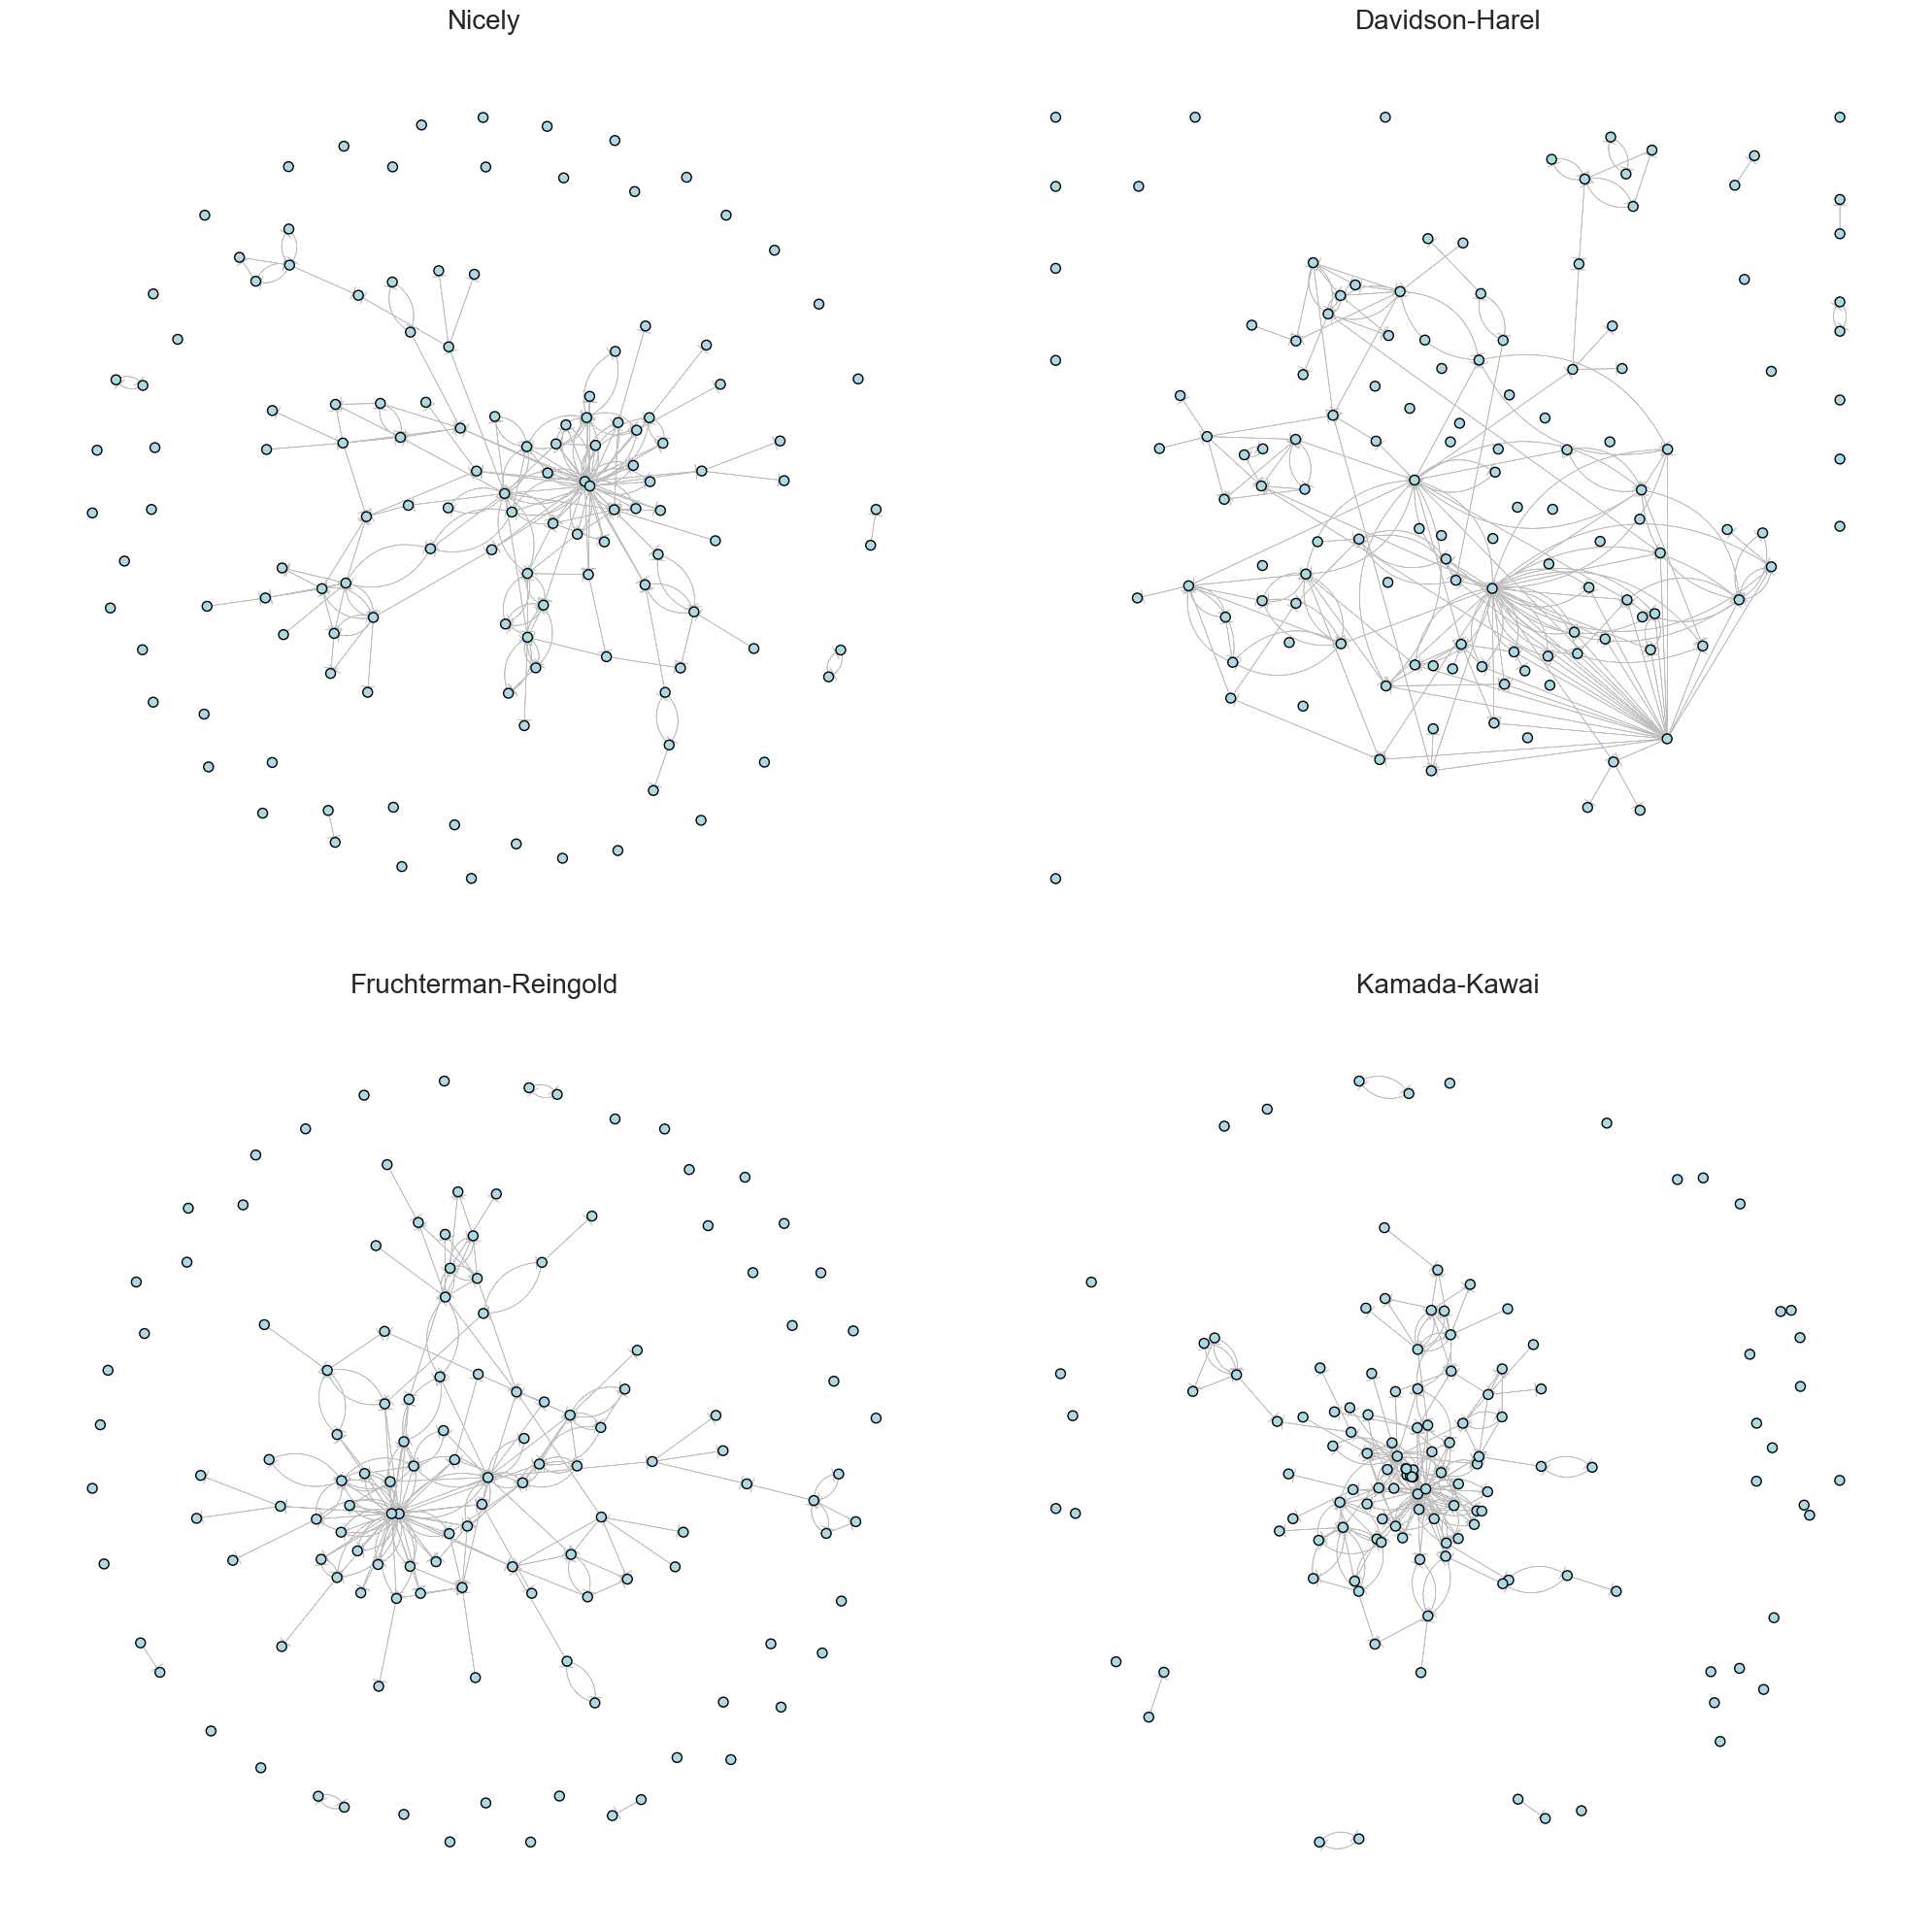

In [47]:
# Configurar el diseño de la figura
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Configurar y dibujar los gráficos en cada subfigura
ig.plot(dg, layout=l_n, vertex_size=10, vertex_label=None, vertex_color='lightblue',
        edge_width=0.5, edge_arrow_size=1, edge_color = "gray",
        bbox=(0, 0, 600, 600), target=axs[0, 0])
axs[0, 0].set_title('Nicely', fontsize=20)

ig.plot(dg, layout=l_dh, vertex_size=10, vertex_label=None, vertex_color='lightblue',
        edge_width=0.5, edge_arrow_size=1, edge_color = "gray",
        bbox=(0, 0, 600, 600), target=axs[0, 1])
axs[0, 1].set_title('Davidson-Harel', fontsize=20)

ig.plot(dg, layout=l_fr, vertex_size=10, vertex_label=None, vertex_color='lightblue',
        edge_width=0.5, edge_arrow_size=1, edge_color = "gray",
        bbox=(0, 0, 600, 600), target=axs[1, 0])
axs[1, 0].set_title('Fruchterman-Reingold', fontsize=20)

ig.plot(dg, layout=l_kk, vertex_size=10, vertex_label=None, vertex_color='lightblue',
        edge_width=0.5, edge_arrow_size=1, edge_color = "gray",
        bbox=(0, 0, 600, 600), target=axs[1, 1])
axs[1, 1].set_title('Kamada-Kawai', fontsize=20)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

(b) Calcule e interprete la media global.

In [48]:
MediaGlobal(Y)

0.018

(c) Obtenga y grafique la distribución del *out-degree* y del *in-degree*. Calcule e interprete la media y la desviación estándar de esta distribución.

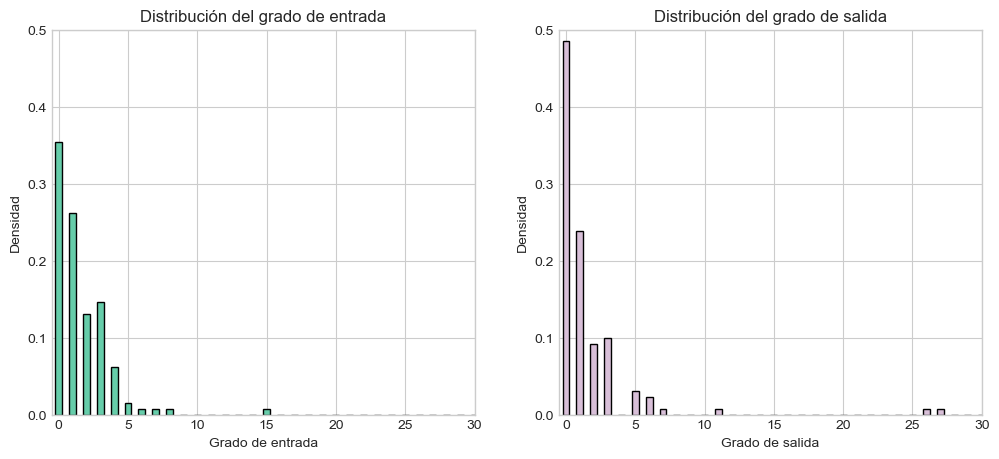

In [49]:
#random.seed(202410)

# Num Vértices
n = dg.vcount()
# Out-degree
out_degree = dg.outdegree()
# In_degree
in_degree = dg.indegree()


# Visualización
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Gráfico de barras de la densidad del grado de salida
density = np.histogram(in_degree, bins=np.arange(n + 1))[0] / n
axes[0].bar(range(n), density, width=0.5, color='mediumaquamarine', edgecolor='black')
axes[0].set_xlabel('Grado de entrada')
axes[0].set_ylabel('Densidad')
axes[0].set_title('Distribución del grado de entrada')
axes[0].set_xlim([-0.5, 30])
axes[0].set_ylim([0, 0.5])

# Gráfico de barras de la densidad del grado de entrada
density = np.histogram(out_degree, bins=np.arange(n + 1))[0] / n
axes[1].bar(range(n), density, width=0.5, color='thistle', edgecolor='black')
axes[1].set_xlabel('Grado de salida')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribución del grado de salida')
axes[1].set_xlim([-0.5, 30])
axes[1].set_ylim([0, 0.5])

plt.show()

In [50]:
print("Media de grados de entrada: ", round(np.mean(in_degree), 4))
print("DE de grados de entrada: ", round(np.std(in_degree), 4))
print()
print("Media de grados de salida: ", round(np.mean(out_degree), 4))
print("DE de grados de salida: ", round(np.std(out_degree), 4))

Media de grados de entrada:  1.5615
DE de grados de entrada:  1.9768

Media de grados de salida:  1.5615
DE de grados de salida:  3.5756


(d) Calcule el coeficiente de correlación entre los valores del *out-degree* y el *in-degree*. Realice un dispersograma de los grados de entrada (eje y) frente a los grados de salida (eje x), junto con la recta y = x como punto de referencia. ¿Qué se puede concluir?

In [51]:
# Calcular el coeficiente de correlación
print("Coeficiente de correlación: ", round(np.corrcoef(out_degree, in_degree)[0, 1], 3))

Coeficiente de correlación:  0.604


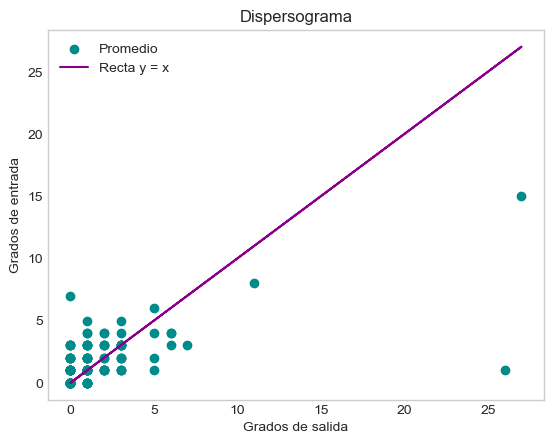

In [52]:
# Crear el dispersograma
plt.scatter(out_degree, in_degree, color = "darkcyan", label = 'Promedio')
plt.plot(out_degree, out_degree, color = 'darkmagenta', label = 'Recta y = x')

plt.xlabel('Grados de salida')
plt.ylabel('Grados de entrada')
plt.title('Dispersograma')
plt.legend()

plt.gca().set_facecolor('white')
plt.grid(color = 'white')

plt.show()

(e) Identifique los países mas activos de acuerdo con el grado.

In [53]:
vertices = dg.get_vertex_dataframe()["name"].tolist()

top_in_degree = [vertices[i] for i in np.argsort(in_degree)[::-1][:5]]
top_out_degree = [vertices[i] for i in np.argsort(out_degree)[::-1][:5]]

print("Top 5 países con mayores grados de entrada:", top_in_degree)
print("Top 5 países con mayores grados de salida:", top_out_degree)

Top 5 países con mayores grados de entrada: ['IRQ', 'USA', 'HAI', 'TUR', 'JPN']
Top 5 países con mayores grados de salida: ['IRQ', 'JOR', 'USA', 'UGA', 'DRC']


### Ejercicio 8

Considere los datos relacionales acerca de los conflictos internacionales del archivo `conflict.RData` habiendo removido los nodos aislados:

In [54]:
# remover nodos aislados
Y = 1 * (Y * Y.transpose() > 0)
deg = Y.apply(np.sum, axis=0)
Y = Y.loc[deg > 0, deg > 0]

Y.head()

,AFG,ANG,BAH,BNG,BUI,CAN,CHN,COS,CUB,CYP,...,SYR,TAW,TAZ,THI,TOG,TUR,UAE,UGA,UKG,USA
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BNG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUI,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


(a) Elabore una visualización decorada de la red teniendo en cuenta diferentes diseños.

In [55]:
## Crear grafo
g = ig.Graph.Adjacency(Y, mode = "undirected")

In [56]:
# Diseños
random.seed(202403)
l_n = g.layout("auto")
l_kk = g.layout_kamada_kawai()
l_lr = g.layout_reingold_tilford_circular()
l_gh = g.layout_graphopt()

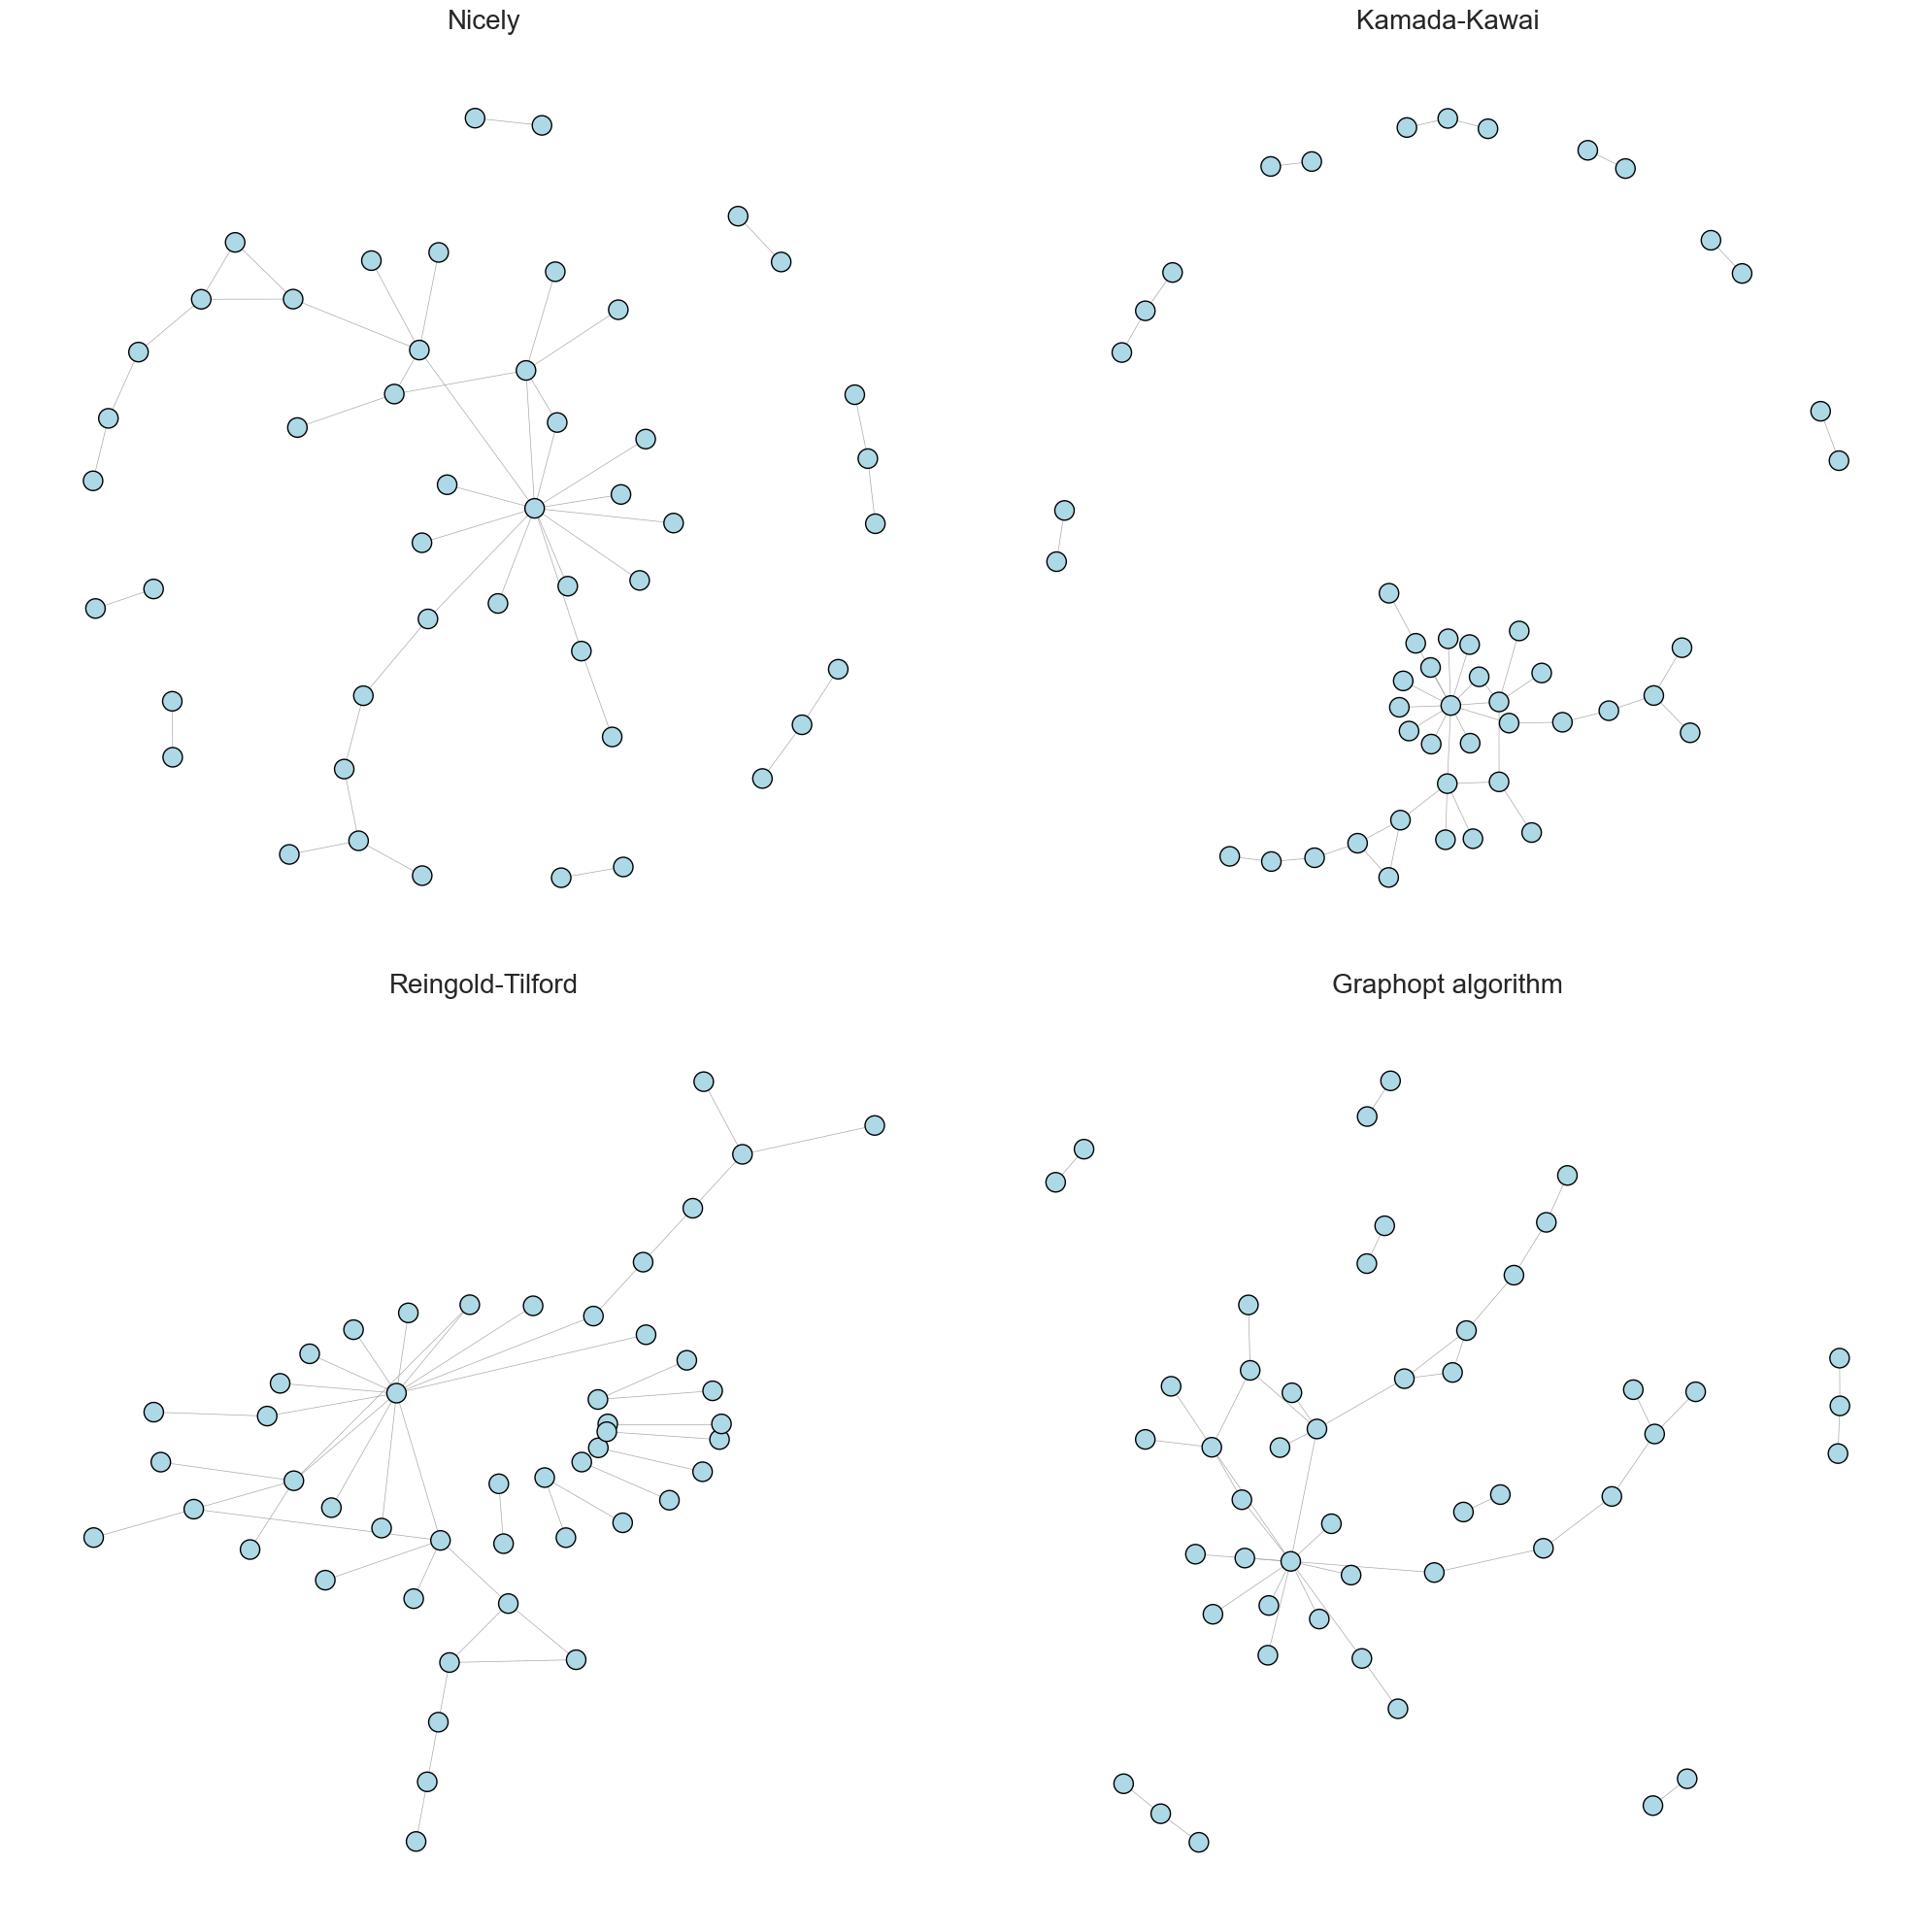

In [57]:
## Configurar el diseño de la figura
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

## Configurar y dibujar los gráficos en cada subfigura
ig.plot(g, layout=l_n, vertex_size=20, vertex_label=None, vertex_color='lightblue', edge_width=0.5, edge_color = "darkgray",
        bbox=(0, 0, 600, 600), target=axs[0, 0])
axs[0, 0].set_title('Nicely', fontsize=20)

ig.plot(g, layout=l_kk, vertex_size=20, vertex_label=None, vertex_color='lightblue', edge_width=0.5, edge_color = "darkgray",
        bbox=(0, 0, 600, 600), target=axs[0, 1])
axs[0, 1].set_title('Kamada-Kawai', fontsize=20)

ig.plot(g, layout=l_lr, vertex_size=20, vertex_label=None, vertex_color='lightblue', edge_width=0.5, edge_color = "darkgray",
        bbox=(0, 0, 600, 600), target=axs[1, 0])
axs[1, 0].set_title('Reingold-Tilford', fontsize=20)

ig.plot(g, layout=l_gh, vertex_size=20, vertex_label=None, vertex_color='lightblue', edge_width=0.5, edge_color = "darkgray",
        bbox=(0, 0, 600, 600), target=axs[1, 1])
axs[1, 1].set_title('Graphopt algorithm', fontsize=20)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

(b) Identifique las componentes conectadas del grafo.

In [58]:
# Componentes
componentes = g.decompose()

print("¿El grafo está conectado?: ", g.is_connected())
print("n componentes: ", len(componentes), end = "\n\n")
print(Counter(len(componente.vs) for componente in componentes))

¿El grafo está conectado?:  False
n componentes:  8

Counter({2: 5, 3: 2, 32: 1})


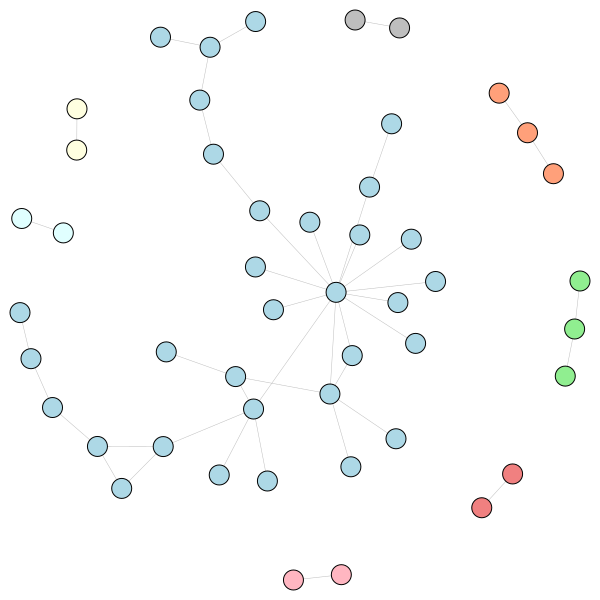

In [59]:
# Visualización
random.seed(202403)
## Lista
colores = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightcyan', 'lightpink', 'lightyellow', 'gray']
## Asignación colores
for i in range(len(componentes)):
    names = componentes[i].get_vertex_dataframe()["name"].tolist()
    g_names = g.get_vertex_dataframe()["name"].tolist()
    for j, vertex_name in enumerate(g_names):
        if vertex_name in names:
            g.vs[j]["color"] = colores[i]
## Trazar el gráfico con los colores asignados a los vértices
ig.plot(g, layout=l_n, vertex_size=20, vertex_label=None, vertex_color=g.vs["color"], edge_width=0.5, edge_color="gray", bbox=(0, 0, 600, 600))

(c) Identifique la componente gigante del grafo

In [60]:
# tamaño de la componte gigante
max(len(componente.vs) for componente in componentes)

32

In [61]:
# proporción de vértices de la componente gigante
round(max(len(componente.vs) for componente in componentes) / len(g.vs), 2)

0.67

In [62]:
# extraer la componente gigante
g_gc = g.components().giant()

print("Características de la componente gigante")
print("Conectividad:", g_gc.vertex_connectivity())
print("Número de vértices:", len(g_gc.vs))
print("Número de aristas:", len(g_gc.es))

Características de la componente gigante
Conectividad: 1
Número de vértices: 32
Número de aristas: 34


(d) Calcule la matriz de distancias geodésicas de la componente gigante del grafo e incrustar estas distancias en un espacio de dos dimensiones por medio de escalamiento multidimensional (`cmdscale` en R).

In [63]:
# Matriz de distancias
distancias = np.array(g_gc.distances())

## Semilla
np.random.seed(202410)
## Ignorar advertencias
warnings.filterwarnings("ignore")

# Escalamiento multidimensional (MDS)
mds = MDS(n_components = 2)
coordenadas = mds.fit_transform(distancias)

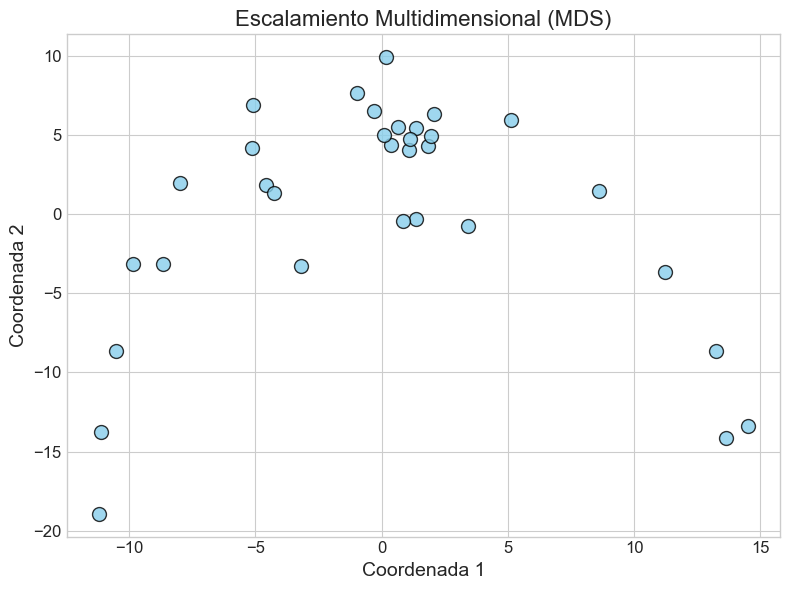

In [64]:
# Graficar las coordenadas
plt.figure(figsize = (8, 6))
plt.scatter(coordenadas[:, 0], coordenadas[:, 1], c = 'skyblue', edgecolor = 'k', s = 100, alpha = 0.8)
plt.title('Escalamiento Multidimensional (MDS)', fontsize=16)
plt.xlabel('Coordenada 1', fontsize=14)
plt.ylabel('Coordenada 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Ejercicio 9

Consiga una base de datos relacionales de su interés de cualquier área de estudio.

(a) ¿De qué se trata la red? ¿A qué corresponden los vértices? ¿Las aristas?

(b) ¿Por qué es interesante estudiar esta red? ¿Qué preguntas se quieren responder?

(c) Elabore una visualización tanto simple como decorada de la red.